<a href="https://colab.research.google.com/github/ravi-3690/ML-WORKSHOP-PROJECTS/blob/main/Fruit_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fruit classification using CNN
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
# Set paths to your dataset
base_dir = '/content/drive/MyDrive/AI ML Training/Fruits Classification'
train_dir = os.path.join(base_dir, '/content/drive/MyDrive/AI ML Training/Fruits Classification/train')
validation_dir = os.path.join(base_dir, '/content/drive/MyDrive/AI ML Training/Fruits Classification/valid')
test_dir = os.path.join(base_dir, '/content/drive/MyDrive/AI ML Training/Fruits Classification/test')

In [ ]:
# Image dimensions
IMG_HEIGHT = 100
IMG_WIDTH = 100
BATCH_SIZE = 32

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 180 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,421 (6.61 MB)

 Trainable params: 1,732,421 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
EPOCHS = 10
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 114s 14s/step - accuracy: 0.1597 - loss: 1.7368 - val_accuracy: 0.2000 - val_loss: 1.6107
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3291 - loss: 1.5618 - val_accuracy: 0.3650 - val_loss: 1.5970
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 716ms/step - accuracy: 0.3969 - loss: 1.4976 - val_accuracy: 0.3200 - val_loss: 1.5311
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 697ms/step - accuracy: 0.5055 - loss: 1.3145 - val_accuracy: 0.3800 - val_loss: 1.5119
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5316 - loss: 1.2982 - val_accuracy: 0.3900 - val_loss: 1.4157
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 719ms/step - accuracy: 0.5601 - loss: 1.1466 - val_accuracy: 0.3950 - val_loss: 1.3849
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 978ms/step - accuracy: 0.5313 - loss: 1.1540 - val_accuracy: 0.3900 - val_loss: 1.4265
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 731ms/step - accuracy: 0.5874 - loss: 1.1007 - val_accuracy: 0.4350 - val_loss: 1.3324
Epoch 9

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.3812 - loss: 1.5155
Test Accuracy: 38.00%


In [ ]:
# Save the model
model.save('fruit_classifier.h5')


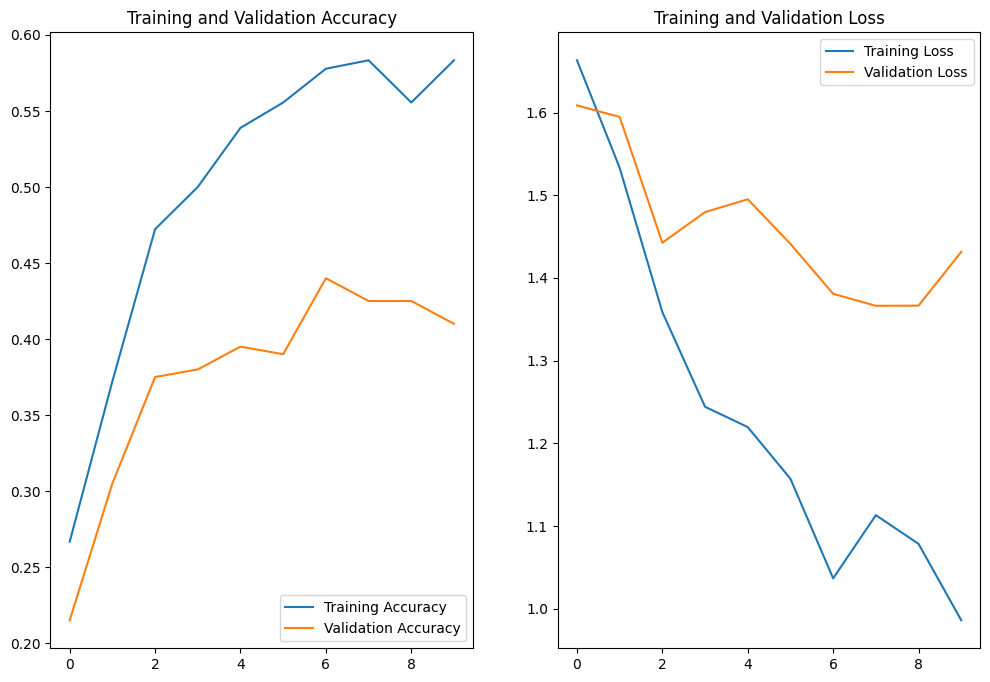

In [ ]:
# Plot training and validation accuracy/loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Test predictions
import numpy as np
from tensorflow.keras.preprocessing import image



In [ ]:
# Load and preprocess a sample image
sample_image_path = '/content/banana.jpg'
img = image.load_img(sample_image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)



In [ ]:

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted class: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: Banana
